# Regression: FIFA 23
## Nana Kwaku Amoako
### Assignment 2

In [ ]:
print("test")

test


### import modules

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Load datasets

In [ ]:
male_players = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Colab Datasets/male_players (legacy).csv")

<ipython-input-17-eac399365ae0>:1: DtypeWarning: Columns (108) have mixed types. Specify dtype option on import or set low_memory=False.
  male_players = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Colab Datasets/male_players (legacy).csv")


In [ ]:
male_players

,player_id,player_url,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url
0,158023,/player/158023/lionel-messi/150002,15,2,2014-09-18,L. Messi,Lionel Andrés Messi Cuccittini,CF,93,95,...,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3,15+3,https://cdn.sofifa.net/players/158/023/15_120.png
1,20801,/player/20801/c-ronaldo-dos-santos-aveiro/150002,15,2,2014-09-18,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"LW, LM",92,92,...,63+3,63+3,63+3,57+3,52+3,52+3,52+3,57+3,16+3,https://cdn.sofifa.net/players/020/801/15_120.png
2,9014,/player/9014/arjen-robben/150002,15,2,2014-09-18,A. Robben,Arjen Robben,"RM, LM, RW",90,90,...,64+3,64+3,64+3,55+3,46+3,46+3,46+3,55+3,14+3,https://cdn.sofifa.net/players/009/014/15_120.png
3,41236,/player/41236/zlatan-ibrahimovic/150002,15,2,2014-09-18,Z. Ibrahimović,Zlatan Ibrahimović,ST,90,90,...,65+3,65+3,61+3,56+3,55+3,55+3,55+3,56+3,17+3,https://cdn.sofifa.net/players/041/236/15_120.png
4,167495,/player/167495/manuel-neuer/150002,15,2,2014-09-18,M. Neuer,Manuel Peter Neuer,GK,90,90,...,40+3,40+3,36+3,36+3,38+3,38+3,38+3,36+3,87+3,https://cdn.sofifa.net/players/167/495/15_120.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161578,269011,/player/269011/ziye-zhao/230002,23,2,2022-09-26,Zhao Ziye,赵梓业,RW,46,61,...,32+2,32+2,37+2,36+2,31+2,31+2,31+2,36+2,14+2,https://cdn.sofifa.net/players/269/011/23_120.png
161579,269019,/player/269019/junjie-wu/230002,23,2,2022-09-26,Wu Junjie,吴俊杰,LB,46,58,...,41+2,41+2,43+2,44+2,48+2,48+2,48+2,44+2,15+2,https://cdn.sofifa.net/players/269/019/23_120.png
161580,271093,/player/271093/kailin-barlow/230002,23,2,2022-09-26,K. Barlow,Kailin Barlow,CDM,46,58,...,45+2,45+2,47+2,47+2,46+2,46+2,46+2,47+2,14+2,https://cdn.sofifa.net/players/271/093/23_120.png
161581,271555,/player/271555/gideon-tetteh/230002,23,2,2022-09-26,G. Tetteh,Gideon Tetteh,"RW, LW",46,70,...,30+2,30+2,34+2,32+2,28+2,28+2,28+2,32+2,15+2,https://cdn.sofifa.net/players/271/555/23_120.png


### DATA PRE-PROCESSING

In [ ]:
male_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161583 entries, 0 to 161582
Columns: 110 entries, player_id to player_face_url
dtypes: float64(18), int64(45), object(47)
memory usage: 135.6+ MB


In [ ]:
male_players.shape

(161583, 110)

In [ ]:
male_players.value_counts()

Series([], Name: count, dtype: int64)

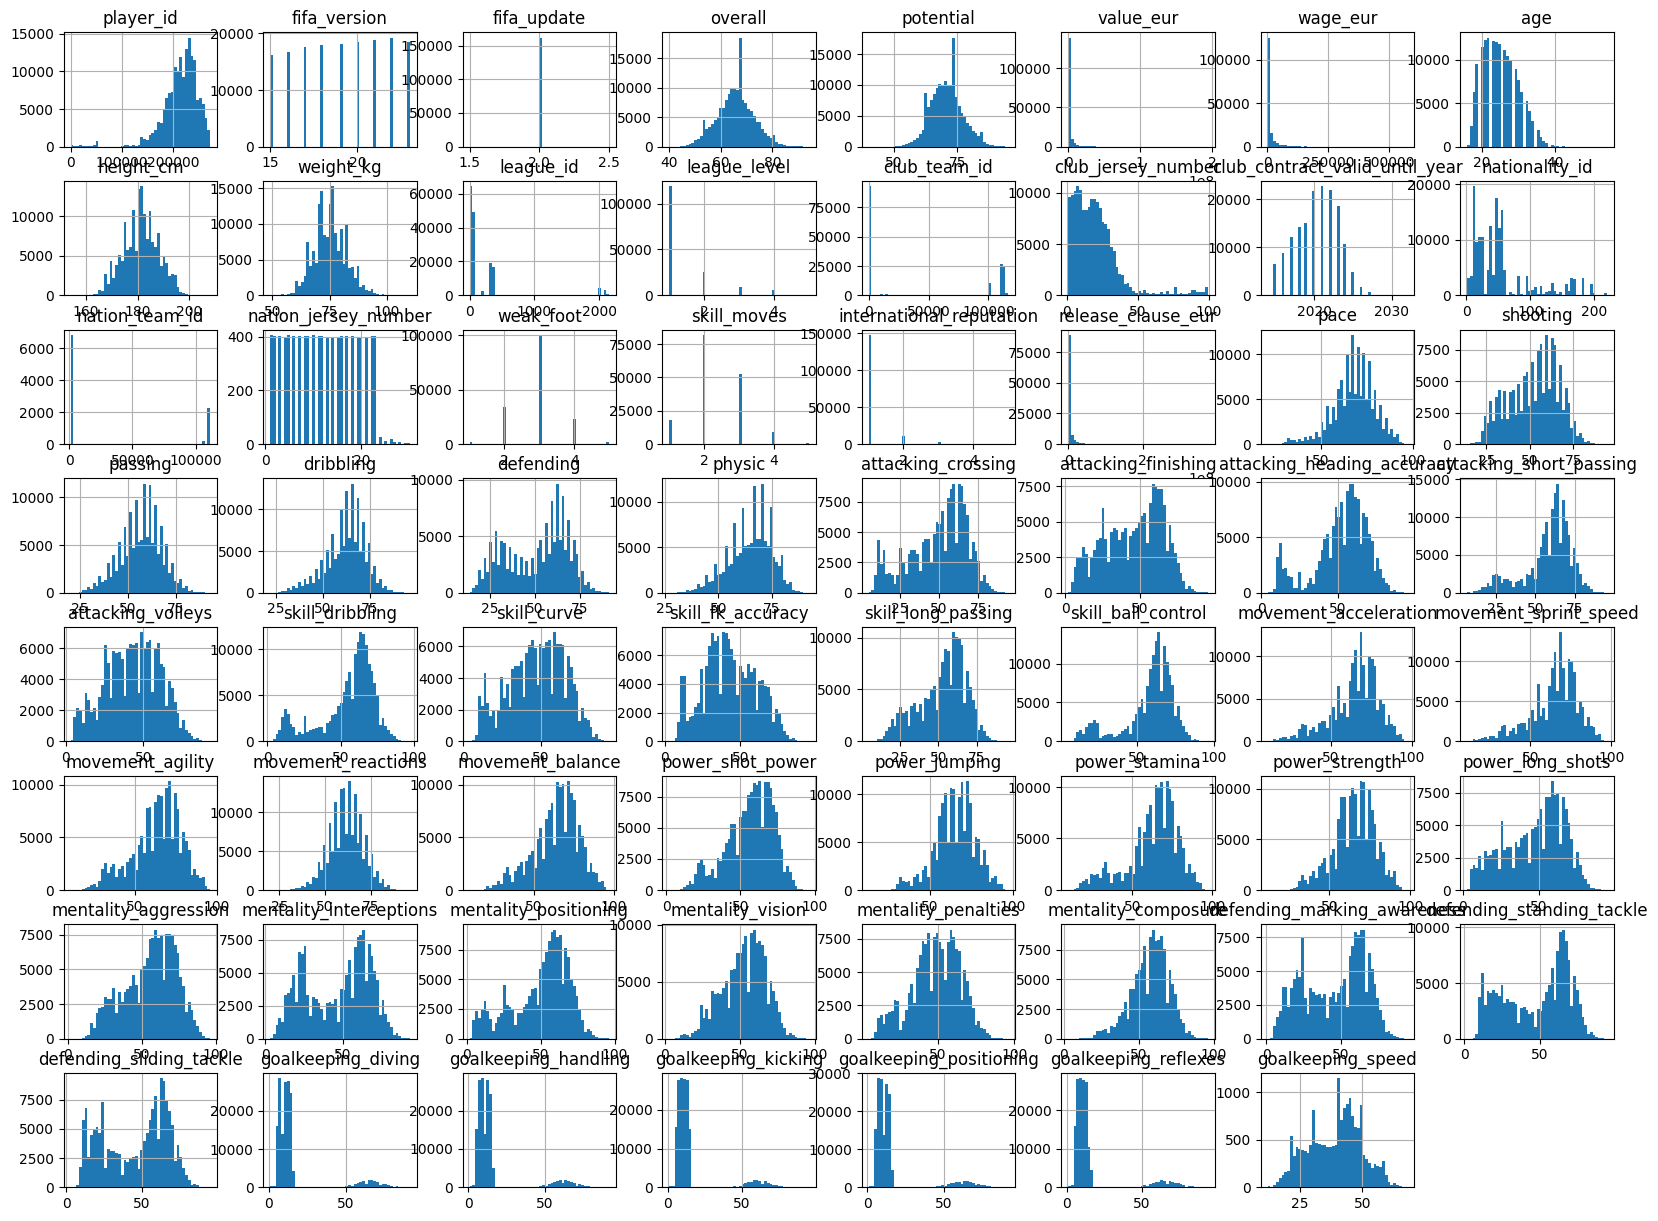

In [ ]:
male_players.hist(bins=50, figsize=(20,15))
plt.show()


use isnull and a file to check the null values thing

### Check for NAs

In [ ]:
dataset = male_players

no_nas = True
for col in dataset.columns:
    if dataset[col].isnull().any():
        print(f"There are nulls in: {col}")
        no_nas = False

if no_nas:
    print("Yup, all good no NAs in any column")

There are nulls in: value_eur
There are nulls in: wage_eur
There are nulls in: league_id
There are nulls in: league_name
There are nulls in: league_level
There are nulls in: club_team_id
There are nulls in: club_name
There are nulls in: club_position
There are nulls in: club_jersey_number
There are nulls in: club_loaned_from
There are nulls in: club_joined_date
There are nulls in: club_contract_valid_until_year
There are nulls in: nation_team_id
There are nulls in: nation_position
There are nulls in: nation_jersey_number
There are nulls in: release_clause_eur
There are nulls in: player_tags
There are nulls in: player_traits
There are nulls in: pace
There are nulls in: shooting
There are nulls in: passing
There are nulls in: dribbling
There are nulls in: defending
There are nulls in: physic
There are nulls in: mentality_composure
There are nulls in: goalkeeping_speed


### Check for columns with NAs greater than a giving threshold

In [ ]:
# dataset name goes here
dataset = male_players

# threshold for missing values (30%)
threshold = 0.30

# calculate the threshold count for missing values
threshold_count = int(threshold * len(dataset))

missing_columns = [col for col in dataset.columns if dataset[col].isnull().sum() > threshold_count]
print("Successfully checked for missing columns")
print(f"No. of missing columns: {len(missing_columns)}")

Successfully checked for missing columns
No. of missing columns: 8


In [ ]:
missing_columns

['club_loaned_from',
 'nation_team_id',
 'nation_position',
 'nation_jersey_number',
 'release_clause_eur',
 'player_tags',
 'player_traits',
 'goalkeeping_speed']

In [ ]:
# drop columns with more than threshold
male_players_cln = dataset.drop(columns=missing_columns)

print("Number of remaining columns:", len(male_players_cln.columns))
print("Remaining columns:")
for col in male_players_cln.columns:
    print(col)

Number of remaining columns: 102
Remaining columns:
player_id
player_url
fifa_version
fifa_update
fifa_update_date
short_name
long_name
player_positions
overall
potential
value_eur
wage_eur
age
dob
height_cm
weight_kg
league_id
league_name
league_level
club_team_id
club_name
club_position
club_jersey_number
club_joined_date
club_contract_valid_until_year
nationality_id
nationality_name
preferred_foot
weak_foot
skill_moves
international_reputation
work_rate
body_type
real_face
pace
shooting
passing
dribbling
defending
physic
attacking_crossing
attacking_finishing
attacking_heading_accuracy
attacking_short_passing
attacking_volleys
skill_dribbling
skill_curve
skill_fk_accuracy
skill_long_passing
skill_ball_control
movement_acceleration
movement_sprint_speed
movement_agility
movement_reactions
movement_balance
power_shot_power
power_jumping
power_stamina
power_strength
power_long_shots
mentality_aggression
mentality_interceptions
mentality_positioning
mentality_vision
mentality_penalties


### Remove them through automation

In [ ]:
male_players_cln

,player_id,player_url,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url
0,158023,/player/158023/lionel-messi/150002,15,2,2014-09-18,L. Messi,Lionel Andrés Messi Cuccittini,CF,93,95,...,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3,15+3,https://cdn.sofifa.net/players/158/023/15_120.png
1,20801,/player/20801/c-ronaldo-dos-santos-aveiro/150002,15,2,2014-09-18,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"LW, LM",92,92,...,63+3,63+3,63+3,57+3,52+3,52+3,52+3,57+3,16+3,https://cdn.sofifa.net/players/020/801/15_120.png
2,9014,/player/9014/arjen-robben/150002,15,2,2014-09-18,A. Robben,Arjen Robben,"RM, LM, RW",90,90,...,64+3,64+3,64+3,55+3,46+3,46+3,46+3,55+3,14+3,https://cdn.sofifa.net/players/009/014/15_120.png
3,41236,/player/41236/zlatan-ibrahimovic/150002,15,2,2014-09-18,Z. Ibrahimović,Zlatan Ibrahimović,ST,90,90,...,65+3,65+3,61+3,56+3,55+3,55+3,55+3,56+3,17+3,https://cdn.sofifa.net/players/041/236/15_120.png
4,167495,/player/167495/manuel-neuer/150002,15,2,2014-09-18,M. Neuer,Manuel Peter Neuer,GK,90,90,...,40+3,40+3,36+3,36+3,38+3,38+3,38+3,36+3,87+3,https://cdn.sofifa.net/players/167/495/15_120.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161578,269011,/player/269011/ziye-zhao/230002,23,2,2022-09-26,Zhao Ziye,赵梓业,RW,46,61,...,32+2,32+2,37+2,36+2,31+2,31+2,31+2,36+2,14+2,https://cdn.sofifa.net/players/269/011/23_120.png
161579,269019,/player/269019/junjie-wu/230002,23,2,2022-09-26,Wu Junjie,吴俊杰,LB,46,58,...,41+2,41+2,43+2,44+2,48+2,48+2,48+2,44+2,15+2,https://cdn.sofifa.net/players/269/019/23_120.png
161580,271093,/player/271093/kailin-barlow/230002,23,2,2022-09-26,K. Barlow,Kailin Barlow,CDM,46,58,...,45+2,45+2,47+2,47+2,46+2,46+2,46+2,47+2,14+2,https://cdn.sofifa.net/players/271/093/23_120.png
161581,271555,/player/271555/gideon-tetteh/230002,23,2,2022-09-26,G. Tetteh,Gideon Tetteh,"RW, LW",46,70,...,30+2,30+2,34+2,32+2,28+2,28+2,28+2,32+2,15+2,https://cdn.sofifa.net/players/271/555/23_120.png


In [ ]:
male_players_cln.describe()

,player_id,fifa_version,fifa_update,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,...,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,161583.000000,161583.000000,161583.0,161583.000000,161583.000000,1.595300e+05,159822.000000,161583.000000,161583.000000,161583.000000,...,161583.000000,128722.000000,161583.000000,161583.000000,161583.000000,161583.00000,161583.000000,161583.000000,161583.000000,161583.000000
mean,214484.722353,19.125514,2.0,65.699071,70.744008,2.326770e+06,10855.409768,25.123181,181.240205,75.235031,...,48.668492,57.816892,45.757957,47.669996,45.698588,16.52961,16.274918,16.140374,16.288861,16.636973
std,34928.608856,2.559318,0.0,7.040855,6.259121,6.005746e+06,21941.656285,4.670207,6.750148,7.000456,...,15.652208,12.329739,20.453699,21.336404,20.935273,17.67047,16.834294,16.476466,16.998697,17.980143
min,2.000000,15.000000,2.0,40.000000,40.000000,1.000000e+03,500.000000,16.000000,154.000000,49.000000,...,5.000000,3.000000,1.000000,2.000000,3.000000,1.00000,1.000000,1.000000,1.000000,1.000000
25%,199159.000000,17.000000,2.0,61.000000,66.000000,3.250000e+05,2000.000000,21.000000,176.000000,70.000000,...,39.000000,50.000000,26.000000,27.000000,25.000000,8.00000,8.000000,8.000000,8.000000,8.000000
50%,220621.000000,19.000000,2.0,66.000000,70.000000,7.250000e+05,4000.000000,25.000000,181.000000,75.000000,...,50.000000,59.000000,50.000000,54.000000,52.000000,11.00000,11.000000,11.000000,11.000000,11.000000
75%,236958.000000,21.000000,2.0,70.000000,75.000000,1.800000e+06,10000.000000,28.000000,186.000000,80.000000,...,60.000000,66.000000,63.000000,66.000000,64.000000,14.00000,14.000000,14.000000,14.000000,14.000000
max,271817.000000,23.000000,2.0,94.000000,95.000000,1.940000e+08,575000.000000,54.000000,208.000000,110.000000,...,96.000000,96.000000,94.000000,94.000000,95.000000,91.00000,92.000000,95.000000,92.000000,94.000000


remove non-numerical data

encode non-numeric tables

### CORRELATION MATRIX

Selecting the best correlated features

In [ ]:
correlation_matrix = male_players_cln.select_dtypes(include=[np.number]).corr()

map the correlation based on the overall column to check how the overall rating of players correlates with the other features

In [ ]:
corr_overall = correlation_matrix['overall'].sort_values(ascending=False)

In [ ]:
corr_overall

overall                           1.000000
movement_reactions                0.845753
potential                         0.695362
mentality_composure               0.683307
passing                           0.681114
wage_eur                          0.611368
dribbling                         0.606575
value_eur                         0.566827
physic                            0.513279
attacking_short_passing           0.499757
mentality_vision                  0.493282
international_reputation          0.485234
skill_long_passing                0.483808
shooting                          0.482498
power_shot_power                  0.480297
age                               0.458390
skill_ball_control                0.457011
skill_curve                       0.415863
power_long_shots                  0.409086
mentality_aggression              0.398310
attacking_crossing                0.396833
skill_fk_accuracy                 0.387269
attacking_volleys                 0.377048
skill_dribb

In [ ]:
# # if the absolute correlation value > 0.5 add to list
# selected_cols = [col for col, corr in dict.items() if abs(corr) > 0.3]

In [ ]:
selected_cols = [
                  'overall', 'passing', 'dribbling', 'potential', 'attacking_short_passing', 'shooting',
                  'skill_long_passing', 'skill_ball_control', 'attacking_crossing',
                  'skill_fk_accuracy', 'mentality_vision', 'mentality_aggression',
                  'mentality_positioning', 'mentality_penalties', 'movement_reactions',
                  'potential', 'wage_eur', 'value_eur', 'international_reputation', 'physic',
                  'age', "goalkeeping_diving", "goalkeeping_handling", "goalkeeping_kicking",
                  "goalkeeping_positioning", "goalkeeping_reflexes"
]

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Colab Datasets/male_players (legacy).csv", usecols=selected_cols)

In [ ]:
df

,overall,potential,value_eur,wage_eur,age,international_reputation,shooting,passing,dribbling,physic,...,movement_reactions,mentality_aggression,mentality_positioning,mentality_vision,mentality_penalties,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,93,95,100500000.0,550000.0,27,5,89.0,86.0,96.0,63.0,...,94,48,92,90,76,6,11,15,14,8
1,92,92,79000000.0,375000.0,29,5,93.0,81.0,91.0,79.0,...,90,63,91,81,85,7,11,15,14,11
2,90,90,54500000.0,275000.0,30,5,86.0,83.0,92.0,64.0,...,89,47,89,84,80,10,8,11,5,15
3,90,90,52500000.0,275000.0,32,5,91.0,81.0,86.0,86.0,...,85,84,86,83,91,13,15,10,9,12
4,90,90,63500000.0,300000.0,28,5,NaN,NaN,NaN,NaN,...,89,29,25,20,37,87,85,92,90,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161578,46,61,110000.0,700.0,18,1,48.0,40.0,47.0,44.0,...,39,26,40,42,54,9,13,13,12,7
161579,46,58,110000.0,750.0,19,1,25.0,29.0,34.0,57.0,...,42,46,31,31,31,6,14,8,13,14
161580,46,58,110000.0,500.0,19,1,36.0,43.0,46.0,53.0,...,50,51,53,40,37,8,9,7,14,9
161581,46,70,150000.0,500.0,17,1,50.0,36.0,46.0,42.0,...,45,27,45,44,63,13,12,14,7,13


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161583 entries, 0 to 161582
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   overall                   161583 non-null  int64  
 1   potential                 161583 non-null  int64  
 2   value_eur                 159530 non-null  float64
 3   wage_eur                  159822 non-null  float64
 4   age                       161583 non-null  int64  
 5   international_reputation  161583 non-null  int64  
 6   shooting                  143614 non-null  float64
 7   passing                   143614 non-null  float64
 8   dribbling                 143614 non-null  float64
 9   physic                    143614 non-null  float64
 10  attacking_crossing        161583 non-null  int64  
 11  attacking_short_passing   161583 non-null  int64  
 12  skill_fk_accuracy         161583 non-null  int64  
 13  skill_long_passing        161583 non-null  i

fill NAs

In [ ]:
# df.fillna(df.median(), inplace=True)
df.fillna(0, inplace=True)

In [ ]:
df.shape

(161583, 25)

In [ ]:
df

,overall,potential,value_eur,wage_eur,age,international_reputation,shooting,passing,dribbling,physic,...,movement_reactions,mentality_aggression,mentality_positioning,mentality_vision,mentality_penalties,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,93,95,100500000.0,550000.0,27,5,89.0,86.0,96.0,63.0,...,94,48,92,90,76,6,11,15,14,8
1,92,92,79000000.0,375000.0,29,5,93.0,81.0,91.0,79.0,...,90,63,91,81,85,7,11,15,14,11
2,90,90,54500000.0,275000.0,30,5,86.0,83.0,92.0,64.0,...,89,47,89,84,80,10,8,11,5,15
3,90,90,52500000.0,275000.0,32,5,91.0,81.0,86.0,86.0,...,85,84,86,83,91,13,15,10,9,12
4,90,90,63500000.0,300000.0,28,5,0.0,0.0,0.0,0.0,...,89,29,25,20,37,87,85,92,90,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161578,46,61,110000.0,700.0,18,1,48.0,40.0,47.0,44.0,...,39,26,40,42,54,9,13,13,12,7
161579,46,58,110000.0,750.0,19,1,25.0,29.0,34.0,57.0,...,42,46,31,31,31,6,14,8,13,14
161580,46,58,110000.0,500.0,19,1,36.0,43.0,46.0,53.0,...,50,51,53,40,37,8,9,7,14,9
161581,46,70,150000.0,500.0,17,1,50.0,36.0,46.0,42.0,...,45,27,45,44,63,13,12,14,7,13


In [ ]:
no_nas = True
for col in df.columns:
    if df[col].isnull().any():
        print(f"There are nulls in: {col}")
        no_nas = False

if no_nas:
    print("Yup, all good no NAs in any column")


Yup, all good no NAs in any column


# FEATURE ENGINEERING

Combining similar features

In [ ]:
mentality = ["mentality_aggression", "mentality_positioning",
    "mentality_vision", "mentality_penalties"]

df['mentality'] = df[mentality].mean(axis=1)

df.drop(columns=mentality, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161583 entries, 0 to 161582
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   overall                   161583 non-null  int64  
 1   potential                 161583 non-null  int64  
 2   value_eur                 161583 non-null  float64
 3   wage_eur                  161583 non-null  float64
 4   age                       161583 non-null  int64  
 5   international_reputation  161583 non-null  int64  
 6   shooting                  161583 non-null  float64
 7   passing                   161583 non-null  float64
 8   dribbling                 161583 non-null  float64
 9   physic                    161583 non-null  float64
 10  attacking_crossing        161583 non-null  int64  
 11  attacking_short_passing   161583 non-null  int64  
 12  skill_fk_accuracy         161583 non-null  int64  
 13  skill_long_passing        161583 non-null  i

In [ ]:
technical_skills = ["skill_fk_accuracy",
    "skill_long_passing", "skill_ball_control"]

df['technical_skills'] = df[technical_skills].mean(axis=1)

df.drop(columns=technical_skills, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161583 entries, 0 to 161582
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   overall                   161583 non-null  int64  
 1   potential                 161583 non-null  int64  
 2   value_eur                 161583 non-null  float64
 3   wage_eur                  161583 non-null  float64
 4   age                       161583 non-null  int64  
 5   international_reputation  161583 non-null  int64  
 6   shooting                  161583 non-null  float64
 7   passing                   161583 non-null  float64
 8   dribbling                 161583 non-null  float64
 9   physic                    161583 non-null  float64
 10  attacking_crossing        161583 non-null  int64  
 11  attacking_short_passing   161583 non-null  int64  
 12  movement_reactions        161583 non-null  int64  
 13  goalkeeping_diving        161583 non-null  i

In [ ]:
goal_keeping = ["goalkeeping_diving", "goalkeeping_handling", "goalkeeping_kicking",
    "goalkeeping_positioning", "goalkeeping_reflexes"]

df['goal_keeping'] = df[goal_keeping].mean(axis=1)

df.drop(columns=goal_keeping, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161583 entries, 0 to 161582
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   overall                   161583 non-null  int64  
 1   potential                 161583 non-null  int64  
 2   value_eur                 161583 non-null  float64
 3   wage_eur                  161583 non-null  float64
 4   age                       161583 non-null  int64  
 5   international_reputation  161583 non-null  int64  
 6   shooting                  161583 non-null  float64
 7   passing                   161583 non-null  float64
 8   dribbling                 161583 non-null  float64
 9   physic                    161583 non-null  float64
 10  attacking_crossing        161583 non-null  int64  
 11  attacking_short_passing   161583 non-null  int64  
 12  movement_reactions        161583 non-null  int64  
 13  mentality                 161583 non-null  f

### Columns to be used for training (Potential):
Physical Attributes: height_cm, weight_kg

Skill Attributes: pace, shooting, passing, dribbling, defending, physic

Attacking Skills: attacking_crossing, attacking_finishing, attacking_heading_accuracy, attacking_short_passing, attacking_volleys

Skill Moves: skill_dribbling, skill_curve, skill_fk_accuracy, skill_long_passing, skill_ball_control

Movement: movement_acceleration, movement_sprint_speed, movement_agility, movement_reactions, movement_balance

Power: power_shot_power, power_jumping, power_stamina, power_strength, power_long_shots

Mentality: mentality_aggression, mentality_interceptions, mentality_positioning, mentality_vision, mentality_penalties, mentality_composure

Defending: defending_marking_awareness, defending_standing_tackle, defending_sliding_tackle

Goalkeeping: goalkeeping_diving, goalkeeping_handling, goalkeeping_kicking, goalkeeping_positioning, goalkeeping_reflexes

Personal Info: age, preferred_foot, weak_foot, skill_moves, international_reputation, work_rate, body_type


### Imputing

In [ ]:
# Imputing
df = df.astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161583 entries, 0 to 161582
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype
---  ------                    --------------   -----
 0   overall                   161583 non-null  int64
 1   potential                 161583 non-null  int64
 2   value_eur                 161583 non-null  int64
 3   wage_eur                  161583 non-null  int64
 4   age                       161583 non-null  int64
 5   international_reputation  161583 non-null  int64
 6   shooting                  161583 non-null  int64
 7   passing                   161583 non-null  int64
 8   dribbling                 161583 non-null  int64
 9   physic                    161583 non-null  int64
 10  attacking_crossing        161583 non-null  int64
 11  attacking_short_passing   161583 non-null  int64
 12  movement_reactions        161583 non-null  int64
 13  mentality                 161583 non-null  int64
 14  technical_skills    

## TRAINING

In [ ]:
# Target variable (y) = 'overall' (player's overall rating)
y = df['overall']
X = df.drop('overall', axis=1)  # all variables excluding 'overall'

In [ ]:
sc = StandardScaler()

In [ ]:
scaled = sc.fit_transform(X)

In [ ]:
X = pd.DataFrame(scaled, columns=X.columns)

In [ ]:
y.head()

0    93
1    92
2    90
3    90
4    90
Name: overall, dtype: int64

In [ ]:
X.head()

,potential,value_eur,wage_eur,age,international_reputation,shooting,passing,dribbling,physic,attacking_crossing,attacking_short_passing,movement_reactions,mentality,technical_skills,goal_keeping
0,3.875315,16.440733,24.679341,0.401872,10.148137,2.025430,1.730887,1.872535,0.241325,1.907629,2.086204,3.535775,1.827725,2.417782,-0.351996
1,3.396013,12.841286,16.670474,0.830120,10.148137,2.215712,1.486368,1.643181,0.957239,1.852080,1.609554,3.099571,2.125940,2.015323,-0.293082
2,3.076478,8.739590,12.093979,1.044244,10.148137,1.882719,1.584176,1.689052,0.286070,1.685432,1.881925,2.990520,1.753171,2.149476,-0.410911
3,3.076478,8.404758,12.093979,1.472491,10.148137,2.120571,1.486368,1.413828,1.270452,1.463234,1.745740,2.554317,2.573263,2.082399,-0.293082
4,3.076478,10.246336,13.238103,0.615996,10.148137,-2.208328,-2.474842,-2.531055,-2.577587,-1.369786,-1.114157,2.990520,-1.825413,-1.271429,4.243322


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161583 entries, 0 to 161582
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   potential                 161583 non-null  float64
 1   value_eur                 161583 non-null  float64
 2   wage_eur                  161583 non-null  float64
 3   age                       161583 non-null  float64
 4   international_reputation  161583 non-null  float64
 5   shooting                  161583 non-null  float64
 6   passing                   161583 non-null  float64
 7   dribbling                 161583 non-null  float64
 8   physic                    161583 non-null  float64
 9   attacking_crossing        161583 non-null  float64
 10  attacking_short_passing   161583 non-null  float64
 11  movement_reactions        161583 non-null  float64
 12  mentality                 161583 non-null  float64
 13  technical_skills          161583 non-null  f

In [ ]:
y.value_counts()

overall
64    9826
65    9795
66    9645
67    9583
63    8919
68    8848
69    7921
62    7818
70    7466
61    6585
60    6503
71    6315
72    6076
73    5204
59    5014
58    4589
74    4243
75    4147
57    3774
56    3372
76    3000
55    2911
54    2431
77    2297
53    2116
78    1845
52    1804
79    1475
51    1327
80    1162
50    1055
81     820
82     705
49     601
83     517
48     381
84     372
85     231
47     199
86     163
87     129
88      98
46      76
89      69
90      41
45      36
91      24
44      19
92      11
93       7
94       6
42       4
43       3
40       3
41       2
Name: count, dtype: int64

In [ ]:
# splitting data into training and testing
# X - training
# y - testing

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
Xtrain.shape

(129266, 15)

In [ ]:
  from sklearn.linear_model import LinearRegression
  from sklearn.tree import DecisionTreeRegressor
  from sklearn.ensemble import GradientBoostingRegressor
  from sklearn.svm import SVR
  from sklearn.neighbors import KNeighborsRegressor
  from sklearn.ensemble import RandomForestRegressor
  from sklearn.ensemble import AdaBoostRegressor
  from sklearn.ensemble import VotingRegressor
  from xgboost import XGBRegressor
  from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor(),
    "Support Vector Regressor": SVR(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "XGB Regressor": XGBRegressor()
}

In [ ]:
def train_and_evaluate(model_name, model, Xtrain, Ytrain, Xtest, Ytest):
    model.fit(Xtrain, Ytrain)
    y_pred = model.predict(Xtest)
    mae = mean_absolute_error(Ytest, y_pred)
    mse = mean_squared_error(Ytest, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(Ytest, y_pred)
    print(f"{model_name}:")
    print(f"  Mean Absolute Error: {mae}")
    print(f"  Mean Squared Error: {mse}")
    print(f"  Root Mean Squared Error: {rmse}")
    print(f"  R2 Score: {r2}")
    print()

In [ ]:
# Loop through models and train/evaluate each one
for name, model in models.items():
    train_and_evaluate(name, model, Xtrain, Ytrain, Xtest, Ytest)

## TO BE EDITED LATER ⬇️

In [ ]:
# initialize model
# xgb = GradientBoostingRegressor()
regressor = RandomForestRegressor()

In [ ]:
regressor.fit(Xtrain, Ytrain)

RandomForestRegressor()

In [ ]:
y_pred = regressor.predict(Xtest)
y_pred

array([64.03, 58.69, 60.5 , ..., 61.97, 55.42, 70.  ])

Using MAE to calculate the mean absolute error between the predicted values and the actual values

In [ ]:
mean_absolute_error(Ytest, y_pred)

0.49672525296283704

USING MSE to calculate the mean squared error between the predicted values and the actual values

In [ ]:
mean_squared_error(Ytest, y_pred)

0.6752116378376706

In [ ]:
### Copy housing csv code